# Logistic Regression

In [44]:
library(ISLR)

In [45]:
# Logistic Regression
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [46]:
# Dummy variable indicates that >0.5 is Up
contrasts(Smarket$Direction)

glm.probs=predict(glm.fit,type="response")
glm.pred=rep("Down",1250)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Smarket$Direction)

,Up
Down,0
Up,1


        
glm.pred Down  Up
    Down  145 141
    Up    457 507

## Train and Test

In [47]:
# Hold out data must be in chunk for time series data
train=(Smarket$Year<2005)
Smarket.2005=Smarket[!train,]
Direction.2005=Smarket$Direction[!train]

# Train and predict
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,
            data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fit,Smarket.2005,type="response")

# Evaluate
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"      # .5 is arbitrary, choose cut-off with CV
table(glm.pred,Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

# Linear Discriminant Analysis

In [48]:
library(MASS)
lda.fit=lda(Direction~Lag1+Lag2,data=Smarket,subset=train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

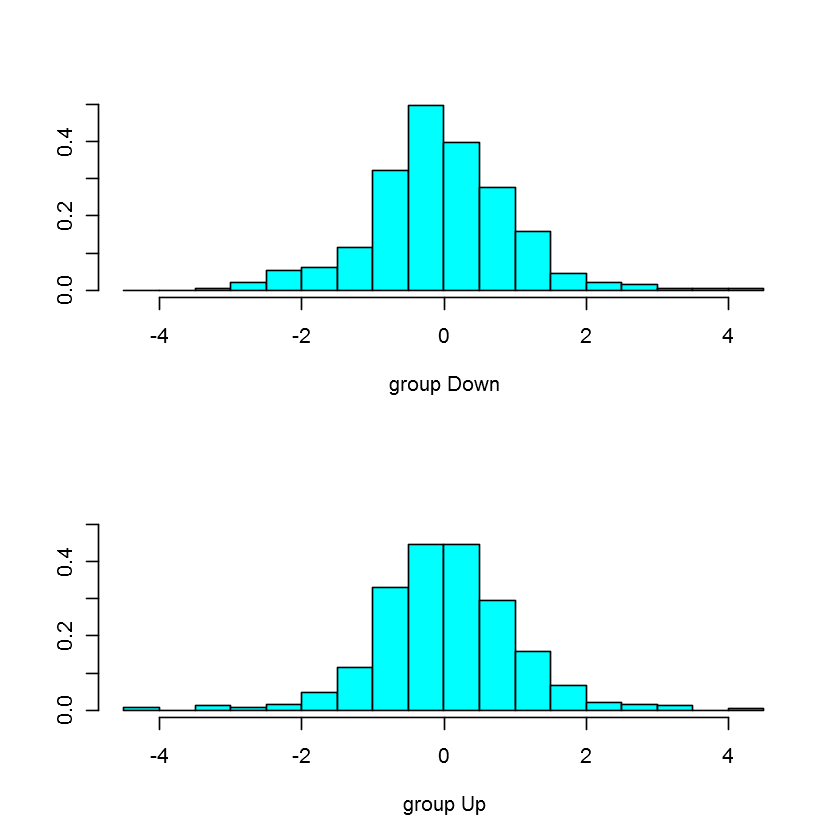

In [49]:
plot(lda.fit)

In [50]:
lda.pred=predict(lda.fit, Smarket.2005)
table(lda.pred$class,Direction.2005)

      Direction.2005
       Down  Up
  Down   35  35
  Up     76 106

# Quadratic Discriminant Analysis

In [51]:
qda.fit=qda(Direction~Lag1+Lag2,data=Smarket,subset=train)
qda.fit
qda.pred=predict(qda.fit,Smarket.2005)
table(qda.pred$class,Direction.2005)

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

      Direction.2005
       Down  Up
  Down   30  20
  Up     81 121

# K-Nearest Neighbors

knn() requires four inputs.
1. A matrix containing the predictors associated with the training data
  - train.X below.
2. A matrix containing the predictors associated with the data for which we wish to make predictions
  - test.X
3. A vector containing the class labels for the training observations, labeled train.
  - Direction
4. A value for K, the number of nearest neighbors to be used by the classifier.

In [55]:
library(class)
train.X=cbind(Smarket$Lag1,Smarket$Lag2)[train,]
test.X=cbind(Smarket$Lag1,Smarket$Lag2)[!train,]

#train.X <- as.matrix(Lag2[train])
#test.X <- as.matrix(Lag2[!train])

train.Direction=Smarket$Direction[train]
set.seed(1)
knn.pred=knn(train.X,test.X,train.Direction,k=1)
table(knn.pred,Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

# An Application to Caravan Insurance Data

In [53]:
# To avoid problems of scale, we can standardize the values 
standardized.X=scale(Caravan[,-86])

test=1:1000
train.X=standardized.X[-test,]
test.X=standardized.X[test,]
train.Y=Caravan$Purchase[-test]
test.Y=Caravan$Purchase[test]

set.seed(1)
knn.pred=knn(train.X,test.X,train.Y,k=1)
table(knn.pred,test.Y)

knn.pred=knn(train.X,test.X,train.Y,k=5)
table(knn.pred,test.Y)

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

        test.Y
knn.pred  No Yes
     No  930  55
     Yes  11   4

In [54]:
glm.fit=glm(Purchase~.,data=Caravan,family=binomial,subset=-test)
glm.probs=predict(glm.fit,Caravan[test,],type="response")

glm.pred=rep("No",1000)
glm.pred[glm.probs>.5]="Yes"
table(glm.pred,test.Y)

glm.pred=rep("No",1000)
glm.pred[glm.probs>.25]="Yes"
table(glm.pred,test.Y)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

        test.Y
glm.pred  No Yes
     No  934  59
     Yes   7   0

        test.Y
glm.pred  No Yes
     No  919  48
     Yes  22  11